**Logistic Regression**
1. Using Library

In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Student Depression Dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


Mounted at /content/drive
   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

# Drop rows with missing values
data_cleaned = data.dropna()

# Re-define the features and target
X = data_cleaned.drop(columns=['id', 'Have you ever had suicidal thoughts ?'])
y = data_cleaned['Have you ever had suicidal thoughts ?']

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

# Optionally, scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities and compute log loss
y_pred_prob = model.predict_proba(X_test)[:, 1]
loss = log_loss(y_test, y_pred_prob)
print(f"Log Loss: {loss}")



Log Loss: 0.5045014207201101


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Student Depression Dataset.csv')

# Preprocess the dataset
X = data.drop(columns=['id', 'Have you ever had suicidal thoughts ?'])
y = data['Have you ever had suicidal thoughts ?']

# Encode the target variable (y) into numeric values
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)  # Convert "Yes"/"No" to 1/0

# Encode categorical variables in X
label_encoder_X = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns
for column in categorical_columns:
    X[column] = label_encoder_X.fit_transform(X[column])

# Handle missing values by imputing with the mean of each column
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X))
X.columns = data.drop(columns=['id', 'Have you ever had suicidal thoughts ?']).columns

# Optionally, scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute log loss using sklearn's log_loss function
loss = log_loss(y_test, y_pred_prob)
print(f"Log Loss: {loss}")

# Manually calculating log loss for individual values (for comparison)
def log_loss_manual(y, y_dash):
    """Manually computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)"""
    loss = - (y * np.log(y_dash)) - ((1 - y) * np.log(1 - y_dash))
    return loss

# Compare log loss manually for a few test samples
for i in range(5):  # Example: take the first 5 test samples
    y_true = y_test[i]  # y_test is now a numpy array, so no need for .item()
    y_pred = y_pred_prob[i]
    print(f"Log Loss for sample {i+1} - True: {y_true}, Pred: {y_pred} = {log_loss_manual(y_true, y_pred)}")

Log Loss: 0.5111521383295985
Manual Log Loss for sample 1 - True: 0, Pred: 0.31743374902418764 = 0.3818956856072782
Manual Log Loss for sample 2 - True: 1, Pred: 0.33192707830421103 = 1.1028399778528652
Manual Log Loss for sample 3 - True: 1, Pred: 0.3185414494435489 = 1.1440026728971495
Manual Log Loss for sample 4 - True: 1, Pred: 0.8483323729168156 = 0.16448277078789636
Manual Log Loss for sample 5 - True: 0, Pred: 0.848946492586239 = 1.8901211512021527


Logistic-transformed values for the first 5 samples:
[[0.70918233 0.27229305 0.74697397 0.50638972 0.79339994 0.49755583
  0.19597208 0.81915551 0.49616518 0.61291496 0.7751483  0.3062773
  0.12670991 0.64530398 0.73742141 0.2335269 ]
 [0.70918233 0.16874252 0.17559112 0.50638972 0.79339994 0.49755583
  0.25508311 0.68480644 0.49616518 0.61291496 0.2346275  0.50291132
  0.48941625 0.78486341 0.27519541 0.69875895]
 [0.70918233 0.16874252 0.28189071 0.50638972 0.65059606 0.49755583
  0.5193514  0.68480644 0.49616518 0.19439579 0.2346275  0.50291132
  0.73818007 0.64530398 0.27519541 0.69875895]
 [0.70918233 0.65650774 0.8191386  0.50638972 0.47446673 0.49755583
  0.4700999  0.193393   0.49616518 0.80221893 0.40716332 0.8011807
  0.78688477 0.78486341 0.73742141 0.69875895]
 [0.70918233 0.81201622 0.32045524 0.50638972 0.65059606 0.49755583
  0.64277114 0.68480644 0.49616518 0.3820025  0.2346275  0.27772272
  0.42261216 0.47569021 0.27519541 0.69875895]]


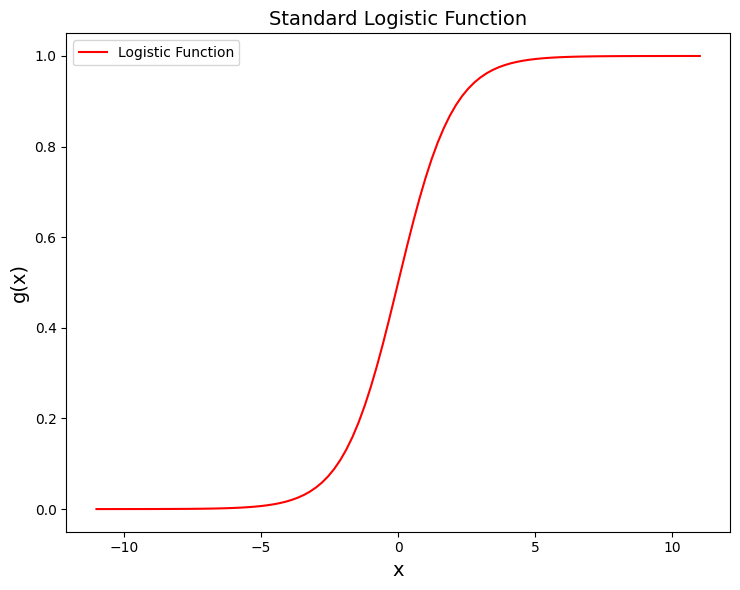

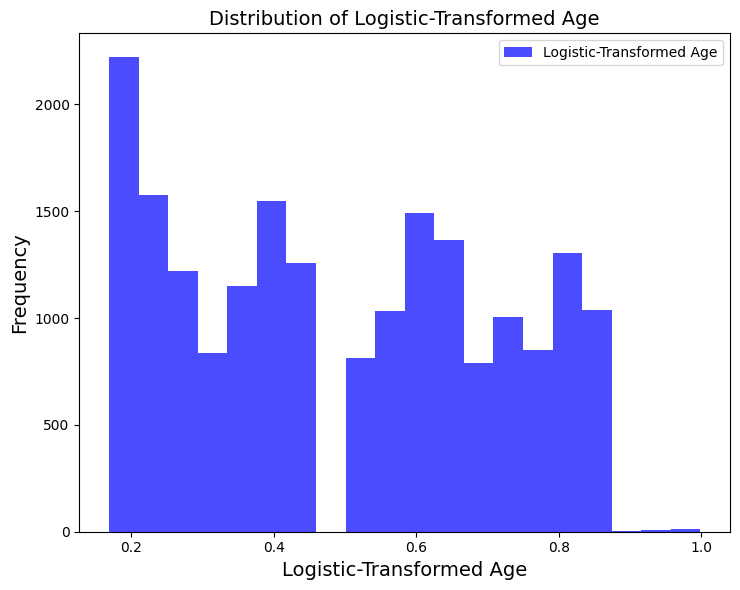

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Logistic function
def logistic(x):
    """
    Computes the logistic function applied to an input scalar/array
    Args: x (scalar/ndarray): scalar or numpy array of any size
    Returns: y (scalar/ndarray): logistic function applied to x, has the same shape as x
    """
    y = 1 / (1 + np.exp(-x))
    return y

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Student Depression Dataset.csv')

# Preprocess the dataset
X = data.drop(columns=['id', 'Have you ever had suicidal thoughts ?'])
y = data['Have you ever had suicidal thoughts ?']

# Encode categorical variables
label_encoder_X = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns
for column in categorical_columns:
    X[column] = label_encoder_X.fit_transform(X[column])

# Encode the target variable (y) into numeric values
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)  # Convert "Yes"/"No" to 1/0

# Handle missing values by imputing with the mean of each column
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X))
X.columns = data.drop(columns=['id', 'Have you ever had suicidal thoughts ?']).columns

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply the logistic function to the scaled features
X_train_logistic = logistic(X_train)
X_test_logistic = logistic(X_test)

# Print the logistic-transformed values for the first 5 samples
print("Logistic-transformed values for the first 5 samples:")
print(X_train_logistic[:5])

# Plotting the logistic function for a specific feature (e.g., 'Age')
plt.figure(figsize=(7.5, 6))
x = np.linspace(-11, 11, 100)
plt.plot(x, logistic(x), color='red', label='Logistic Function')
plt.xlabel("x", fontsize=14)
plt.ylabel("g(x)", fontsize=14)
plt.title("Standard Logistic Function", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting the logistic-transformed feature (e.g., 'Age')
age_index = list(X.columns).index('Age')  # Find the index of the 'Age' column
plt.figure(figsize=(7.5, 6))
plt.hist(X_train_logistic[:, age_index], bins=20, color='blue', alpha=0.7, label='Logistic-Transformed Age')
plt.xlabel("Logistic-Transformed Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Logistic-Transformed Age", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

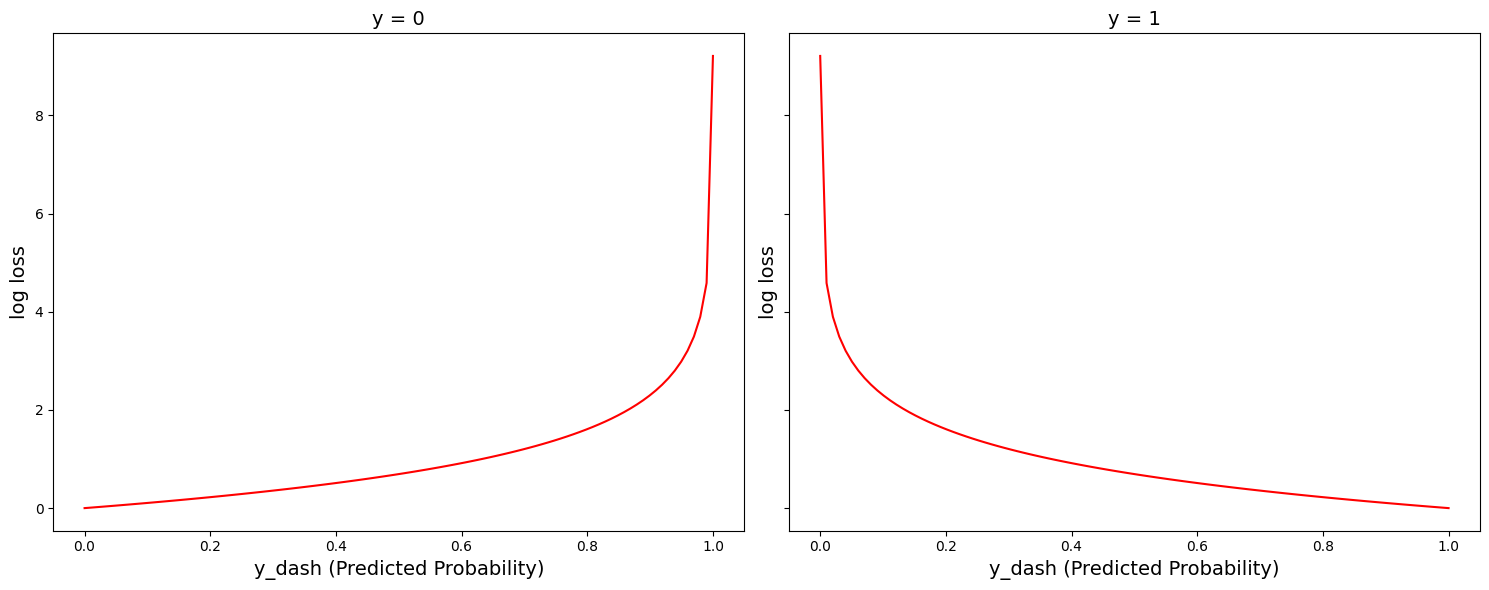

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.impute import SimpleImputer

# ... (Your data loading and preprocessing code remains the same) ...

# Predict probabilities on the test set
y_dash = model.predict_proba(X_test)[:, 1]

# Log loss calculation (Corrected and Improved)
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)
y_dash_range = np.linspace(0.0001, 0.9999, 100)

# Calculate log loss using vectorized operations for efficiency
log_loss_0 = -np.log(1 - y_dash_range)  # Vectorized calculation for y=0
log_loss_1 = -np.log(y_dash_range)      # Vectorized calculation for y=1

# Plotting
ax[0].plot(y_dash_range, log_loss_0, color='red')
ax[0].set_title("y = 0", fontsize=14)
ax[0].set_xlabel("y_dash (Predicted Probability)", fontsize=14)
ax[0].set_ylabel("log loss", fontsize=14)

ax[1].plot(y_dash_range, log_loss_1, color='red')
ax[1].set_title("y = 1", fontsize=14)
ax[1].set_xlabel("y_dash (Predicted Probability)", fontsize=14)
ax[1].set_ylabel("log loss", fontsize=14)

plt.tight_layout()
plt.show()

In [17]:
# Cost function - using for loop
import numpy as np
import pandas as pd
from sklearn.metrics import log_loss  # Import log_loss correctly

# ... (Your data loading and preprocessing code) ...

# Assuming 'Have you ever had suicidal thoughts ?' is your target variable (y)
y = data['Have you ever had suicidal thoughts ?']
# Encode y if it's not already numeric (0 and 1)
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

# Predict probabilities (y_dash) using your trained model
y_dash = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Efficient log loss calculation using vectorized operations
def cost_func(y, y_dash):
    """
    Computes log loss efficiently using vectorized operations.

    Args:
        y (array_like, shape (m,)): Array of true values (0 or 1).
        y_dash (array_like, shape (m,)): Array of predicted probabilities (0 to 1).

    Returns:
        cost (float): The average log loss.
    """
    m = len(y)
    cost = -np.mean(y * np.log(y_dash) + (1 - y) * np.log(1 - y_dash))
    return cost


# Calculate the cost
cost = cost_func(y_test, y_dash)  # Use y_test and y_dash from your test set
print(f"Cost: {cost}")

# Or, even simpler, use sklearn's log_loss directly (for evaluation):
cost_sklearn = log_loss(y_test, y_dash)
print(f"Cost (sklearn): {cost_sklearn}")

Cost: 0.5111521383295985
Cost (sklearn): 0.5111521383295985


In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder

#... (Your data loading and preprocessing code up to the model training)

# 1. Get the true labels (y_test) and predictions (y_dash) from your model
y_test = y_test  # Assuming y_test is already your target from the train_test_split
y_dash = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# 2. Ensure y_test is a NumPy array and contains 0s and 1s
if not isinstance(y_test, np.ndarray):
    y_test = np.array(y_test)

# 3. (Optional but recommended) If y_test contains strings like 'Yes'/'No', convert to 0/1
if y_test.dtype == object: # Check if it contains strings
    le = LabelEncoder()
    y_test = le.fit_transform(y_test)

# 4. Calculate the cost
cost = cost_func_vec(y_test, y_dash)
print(f"Cost: {cost}")

#... (rest of your code)

Cost: 0.5111521383295985


Cleaned Column Names: Index(['id', 'gender', 'age', 'city', 'profession', 'academic_pressure',
       'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction',
       'sleep_duration', 'dietary_habits', 'degree',
       'have_you_ever_had_suicidal_thoughts_?', 'work/study_hours',
       'financial_stress', 'family_history_of_mental_illness', 'depression'],
      dtype='object')
Error: Column 'have_you_ever_had_suicidal_thoughts?' not found in the data.
Accuracy: 0.6255151406557965

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.04      0.08      2089
           1       0.63      0.97      0.76      3492

    accuracy                           0.63      5581
   macro avg       0.56      0.51      0.42      5581
weighted avg       0.58      0.63      0.51      5581



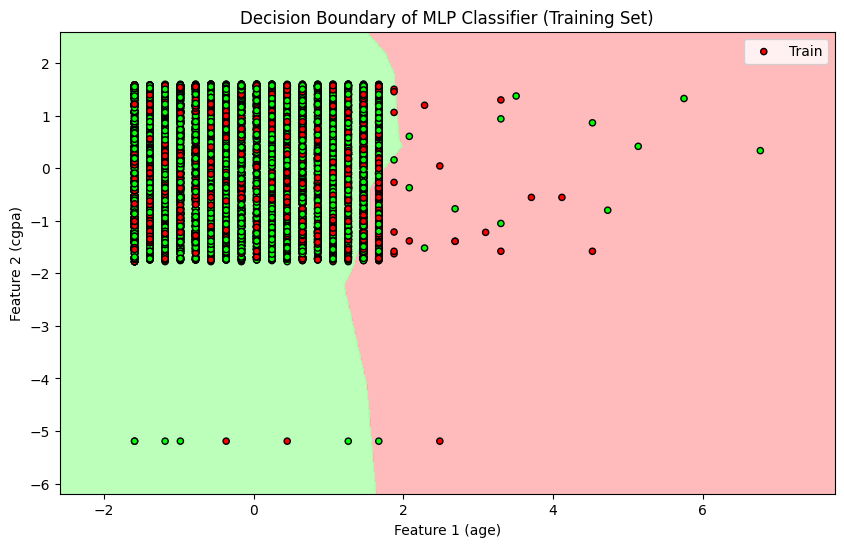

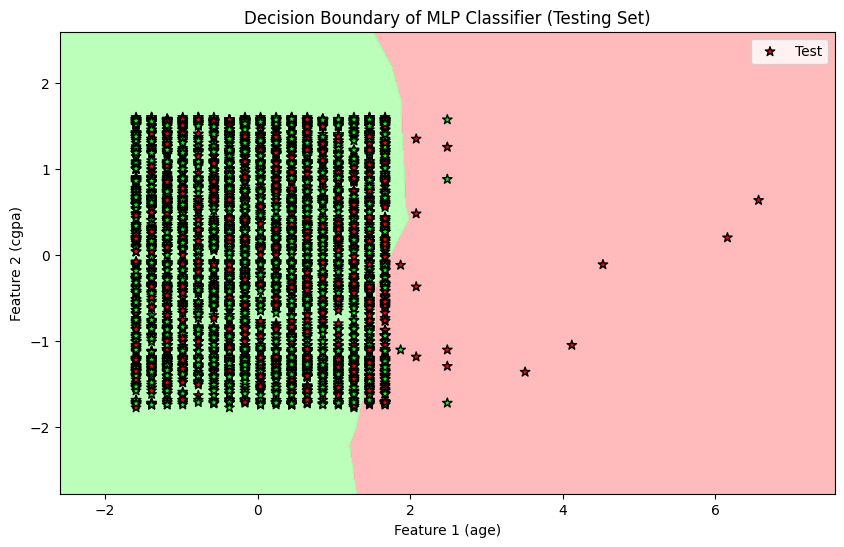

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Student Depression Dataset.csv')

# 2. Clean Column Names (BEST PRACTICE)
def clean_column_names(df):
    cols = df.columns
    new_cols = []
    for col in cols:
        new_col = col.strip().replace(' ', '_').lower()  # Remove spaces, lowercase
        new_cols.append(new_col)
    df.columns = new_cols
    return df

data = clean_column_names(data)
print("Cleaned Column Names:", data.columns)  # Print to verify

# 3. Feature Selection (Choose TWO relevant features)
# Example: Using 'age' and 'cgpa' (REPLACE with your preferred features)
X = data[['age', 'cgpa']].copy()

# 4. Handle Categorical Features (if any)
# Example: Encoding 'gender' (Adapt as needed)
if 'gender' in data.columns:
    le_gender = LabelEncoder()
    data['gender'] = le_gender.fit_transform(data['gender'])
    # Include in X if needed:
    # X['gender'] = data['gender']


# 5. Select and Encode the Target Variable (y)
target_column = 'have_you_ever_had_suicidal_thoughts?'
if target_column in data.columns:
    y = data[target_column]
    le_y = LabelEncoder()
    y = le_y.fit_transform(y)
else:
    print(f"Error: Column '{target_column}' not found in the data.")
    exit()

# 6. Split the Data (after feature selection and encoding)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Standardize the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 8. Train the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)  # Adjust parameters
mlp.fit(X_train, y_train)

# 9. Make Predictions
y_pred = mlp.predict(X_test)

# 10. Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 11. Plot Decision Boundaries (Training Set)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z_train = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z_train = Z_train.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])  # Simplified colormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_train, alpha=0.8, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label='Train')
plt.title("Decision Boundary of MLP Classifier (Training Set)")
plt.xlabel("Feature 1 (age)")       # Replace with your feature names
plt.ylabel("Feature 2 (cgpa)")      # Replace with your feature names
plt.legend()
plt.show()

# 12. Plot Decision Boundaries (Testing Set)
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z_test = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z_test = Z_test.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_test, alpha=0.8, cmap=cmap_light)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, label='Test', marker='*')
plt.title("Decision Boundary of MLP Classifier (Testing Set)")
plt.xlabel("Feature 1 (age)")       # Replace with your feature names
plt.ylabel("Feature 2 (cgpa)")      # Replace with your feature names
plt.legend()
plt.show()

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


class NeuralNetwork:

if __name__ == "__main__":
    # 1. Load your dataset
    data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Student Depression Dataset.csv')

    # 2. Data Preprocessing
    # a. Clean column names (as before - highly recommended)
    def clean_column_names(df):
        cols = df.columns
        new_cols =
        for col in cols:
            new_col = col.strip().replace(' ', '_').lower()
            new_cols.append(new_col)
        df.columns = new_cols
        return df

    data = clean_column_names(data)

    # b. Select features (X) and target (y)
    # Choose your features carefully!  This is VERY important.
    # Example using multiple features:
    X = data[['age', 'cgpa', 'study_satisfaction', 'job_satisfaction', 'sleep_duration']]  # Replace with your features
    # Handle categorical features (if any):
    if 'gender' in data.columns:
        le_gender = LabelEncoder()
        data['gender'] = le_gender.fit_transform(data['gender'])
        X['gender'] = data['gender']  # Add to X
    #... handle other categorical features...

    target_column = 'have_you_ever_had_suicidal_thoughts?'
    if target_column in data.columns:
        y = data[target_column]
        le_y = LabelEncoder()
        y = le_y.fit_transform(y)
    else:
        print(f"Error: Column '{target_column}' not found in the data.")
        exit()


    # c. Split into training and testing sets (before scaling)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

    # d. Scale numerical features (important for neural networks)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)  # Use the same scaler fitted on the training data

    # e. Reshape y for single output neuron (important for binary classification)
    y_train = y_train.reshape(-1, 1)  # Reshape y_train to (m, 1)
    y_test = y_test.reshape(-1, 1)

    # 3. Create and train the Neural Network
    input_size = X_train.shape  # Number of features
    hidden_size = 10  # Adjust as needed
    output_size = 1  # Binary classification (0 or 1)

    nn = NeuralNetwork(input_size, hidden_size, output_size)

    epochs = 5000  # Adjust as needed
    learning_rate = 0.01  # Adjust as needed

    nn.train(X_train, y_train, epochs, learning_rate)

    # 4. Make predictions on the test set
    y_pred = nn.forward(X_test)

    # 5. Evaluate the model (example using accuracy for binary classification)
    y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to 0 or 1
    accuracy = np.mean(y_pred_binary == y_test)
    print(f"Test Accuracy: {accuracy}")


    #... (Further evaluation metrics, confusion matrix, etc.)

IndentationError: expected an indented block after class definition on line 8 (<ipython-input-1-f10994557b2d>, line 11)